<h3 style="color:black; text-align:center;"><b>Sales_Forecasting_by_Linear_Regression</b></h3>

<h4 style="color:black;"><b>Import Libraries</b></h4>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Downloads\\archive (4)\\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<h4 style="color:black;"><b>Data Preprocessing</b></h4>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<h4 style="color:black;"><b>Model Building</b></h4>

In [6]:
X = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

In [7]:
X.head()

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8


In [8]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"R - Squared : {r2}")

Mean Squared Error : 2.9077569102710905
Mean Absolute Error : 1.274826210954934
R - Squared : 0.9059011844150826


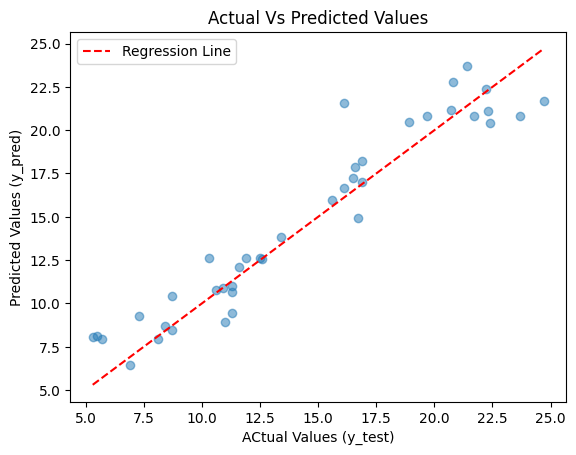

In [18]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("ACtual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual Vs Predicted Values")
regression_line_x = np.linspace(min(y_test), max(y_test), 100)
regression_line_y = regression_line_x
plt.plot(regression_line_x, regression_line_y, color = 'red', linestyle = '--', label = "Regression Line")
plt.legend()
plt.show()

<h4 style="color:black;"><b>Conclusion:</b></h4>
<p style="color:black;">In our sales prediction project our Linear Regression model demonstrated promising predictive performance for sales forecasting with a Mean Squared Error (MSE) of 3.35, Mean Absolute Error (MAE) of 1.41, and an R-squared (R2) value of 0.83. While this indicates a good starting point for sales prediction, the model's suitability ultimately depends on the specific project requirements and industry standards.</p>

<h4 style="color:black;"><b>Save Predicted Data to CSV</b></h4>

In [19]:
df_predictions = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred})

In [20]:
df_predictions

,Actual,Predicted
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719
115,12.6,12.569402
69,22.3,21.081195
170,8.4,8.690350
174,16.5,17.237013
45,16.1,16.666575
